<a href="https://colab.research.google.com/github/Vegito025/Rock-Paper_Scissors/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification Model Using TensorFlow

In this project I am trying to apply Convolutional Neural Networks For Classifying Rock - Paper - Scissors Images. We are using Transfer Learning in which we are sort of using public models to classify our images.


We are using a public collections of images containing Rock-Paper-Scissors hands which contains variety of different hands, from different races, ages, and genders, posed in Rock / Paper or Scissor and labeled as such. These images are not real images and have been generated using CGI techniques as an experiment determining if a CGI-based dataset can be used for classification against real images.

### Importing Our Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

### Downloading the training data and testing data and unzipping the same...

In [ ]:
# Downloading the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Downloading the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-08-01 15:17:17--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   105MB/s    in 1.8s    

2023-08-01 15:17:19 (105 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-08-01 15:17:19--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test

In [ ]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

### Assigning the directory names into variables and look at the filenames

In [ ]:
import os

base_dir = "tmp/rps-train/rps"

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

# Looking at the length and the first ten file names as a sanity check

print("total training rock images: ", len(os.listdir(rock_dir)))
print("total training paper images: ", len(os.listdir(paper_dir)))
print("total training scissors images: ", len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


total training rock images:  840
total training paper images:  840
total training scissors images:  840
['rock03-013.png', 'rock04-006.png', 'rock06ck02-098.png', 'rock05ck01-090.png', 'rock05ck01-048.png', 'rock07-k03-111.png', 'rock07-k03-114.png', 'rock05ck01-031.png', 'rock06ck02-107.png', 'rock02-035.png']
['paper04-061.png', 'paper04-037.png', 'paper04-051.png', 'paper04-004.png', 'paper02-071.png', 'paper03-058.png', 'paper03-039.png', 'paper02-073.png', 'paper03-000.png', 'paper02-067.png']
['scissors01-101.png', 'scissors03-041.png', 'scissors02-086.png', 'scissors02-025.png', 'testscissors02-113.png', 'scissors01-057.png', 'testscissors03-040.png', 'scissors01-116.png', 'testscissors01-118.png', 'scissors04-075.png']


### Checking some of the random images in the training data...

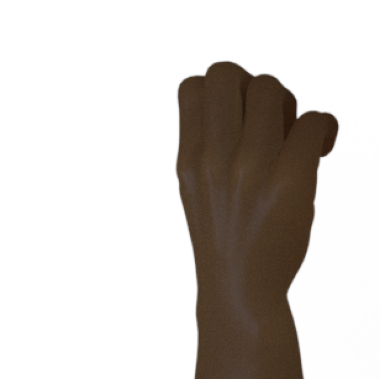

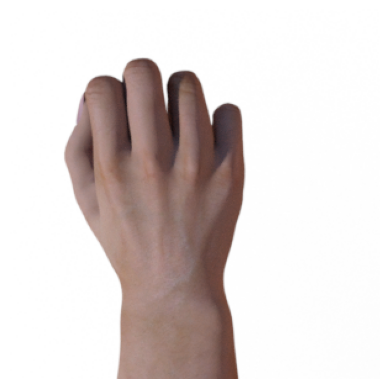

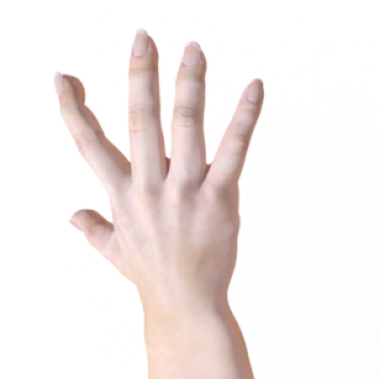

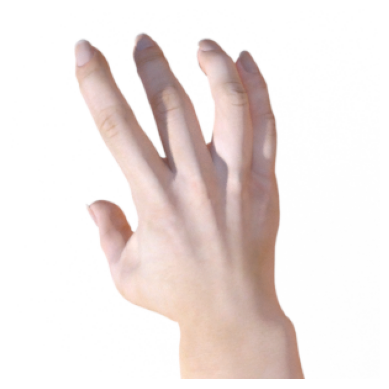

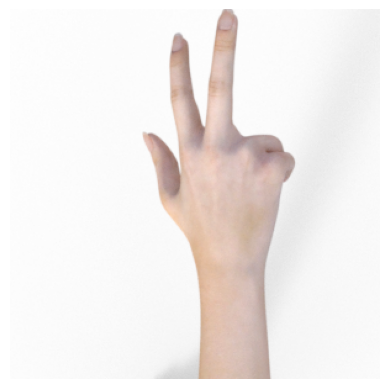

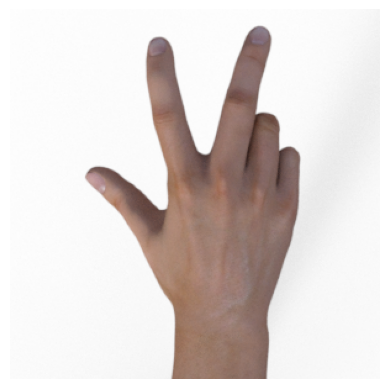

In [ ]:
%matplotlib inline

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Building the Model

In this part we are build a Convolutional Neural Network. For that we are using 4 convolutional layers with 64-64-128-128 filters then append a Dropout layer to avoid overfitting and some Dense layers for the classification.


The output layer would be a 3-neuron dense layer activated by ***Softmax***. We can examine the architecture with `model.summary()` below.

In [ ]:
from keras.activations import activation_layers
model = tf.keras.models.Sequential([
    # The input shape is the desired size of the image 150x150 with 3 bytes color

    #First Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Third Convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Fourth Convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the results to feed into a Deep Neural Network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 Neuron Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])

#Printing the summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Compiling the model which we have created

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Preparing the Image Generator

Using the Image Generator we can create a set of training images. The label for those training images will be the directory name and it will be used by our model to train itself from our training images.

At the same time we will also be creating a validation generator which will be used by our model during the training process to check the loss and the accuracy on the images which the model has never seen.

Image Generator is also used to apply data augmentation on the images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"

training_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip= True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = "tmp/rps-test/rps-test-set"

validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode = 'categorical',
    batch_size = 126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    class_mode = 'categorical',
    batch_size = 126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### Training the Model with our Training Images and checking the accuracy and loss with Test Images

In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=20,
    validation_data= validation_generator
)

Epoch 1/25
20/20 [==============================] - 40s 1s/step - loss: 1.1958 - accuracy: 0.3357 - val_loss: 1.0943 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.0933 - accuracy: 0.3746 - val_loss: 1.0903 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 23s 1s/step - loss: 1.0601 - accuracy: 0.4341 - val_loss: 0.8089 - val_accuracy: 0.6317
Epoch 4/25
20/20 [==============================] - 23s 1s/step - loss: 0.9641 - accuracy: 0.5155 - val_loss: 0.7180 - val_accuracy: 0.5726
Epoch 5/25
20/20 [==============================] - 22s 1s/step - loss: 0.8970 - accuracy: 0.5540 - val_loss: 0.4566 - val_accuracy: 0.6559
Epoch 6/25
20/20 [==============================] - 23s 1s/step - loss: 0.7143 - accuracy: 0.6659 - val_loss: 0.2719 - val_accuracy: 0.9704
Epoch 7/25
20/20 [==============================] - 25s 1s/step - loss: 0.6958 - accuracy: 0.7119 - val_loss: 0.7051 - val_accuracy: 0.6559
Epoch 8/25
20/20 [==

### Checking the accuracy of the model using the returned history by our model.

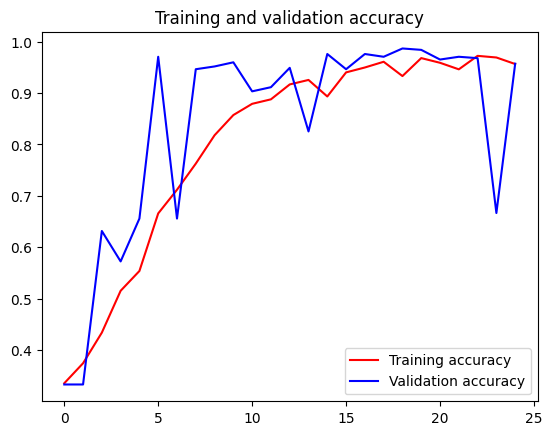

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### Predicting with the random images given by the user

In [12]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving download (2).jpeg to download (2).jpeg
1/1 [==============================] - 0s 293ms/step
download (2).jpeg
[[0. 0. 1.]]
